requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
requirements:  AutoUpdate skipped (offline)


Using cache found in C:\Users\solom/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-10-15 Python-3.12.7 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Processing @DoctorsET_864.jpg...


C:\Users\solom/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


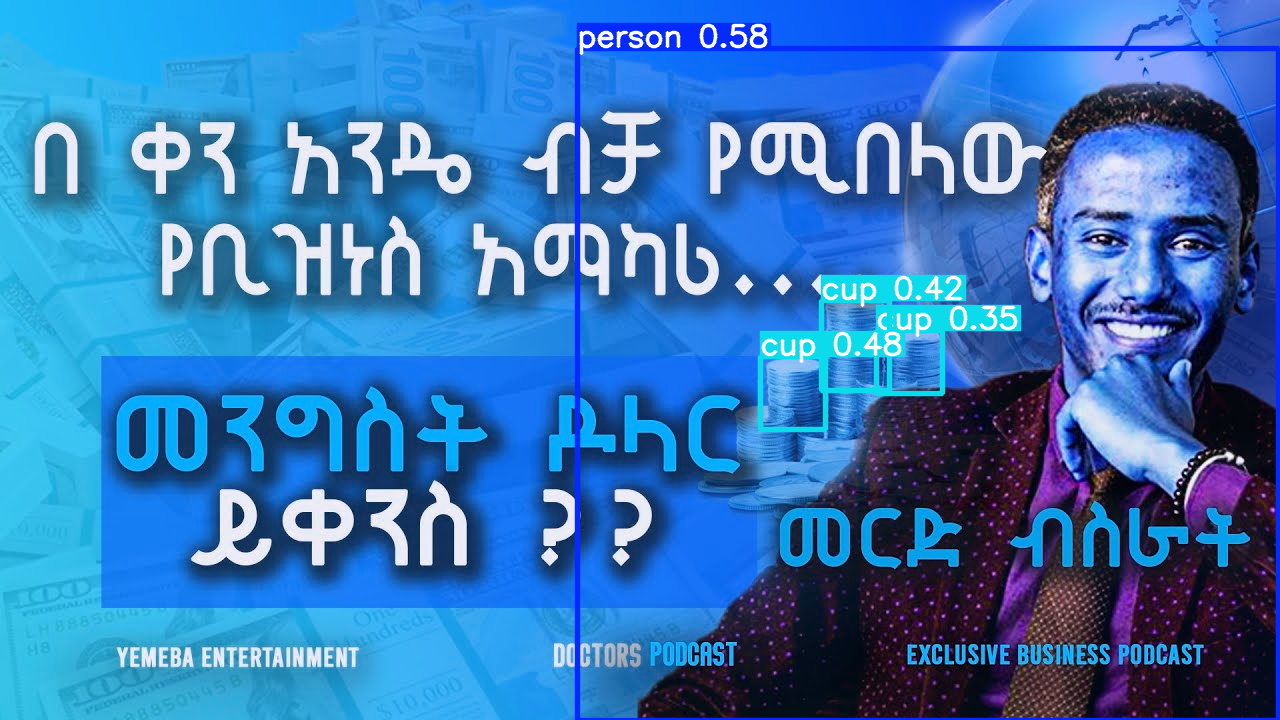

Saved 1 image to ..\detection_results2


Detections for @DoctorsET_864.jpg:
     name  confidence        xmin        ymin         xmax        ymax
0  person    0.582511  577.881348   48.101715  1278.716553  720.000000
1     cup    0.477790  760.004395  356.922424   825.749878  429.225464
2     cup    0.421790  821.572693  300.027893   889.127258  390.778809
3     cup    0.350879  876.995789  330.088745   942.687805  393.424805
Detection results saved to ../detection_results/@DoctorsET_864.jpg_detections.csv


In [2]:
# Task 3: Object Detection Using YOLO

# Import necessary libraries
import torch
import os
import cv2
import pandas as pd

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # You can switch to 'yolov5m', 'yolov5l', etc.

# Define the path to the folder containing images (scraped images from Telegram channels)
image_folder = '../photos'  # Path to folder containing images

# Create an output directory for storing detection results
output_dir = '../detection_results/'
os.makedirs(output_dir, exist_ok=True)

# Loop through the images in the folder and perform object detection
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)
    
    # Process only image files (JPEG, PNG)
    if img_name.endswith(('.jpg', '.jpeg', '.png')):
        print(f"Processing {img_name}...")

        # Read the image using OpenCV
        img = cv2.imread(img_path)

        # Run object detection
        results = model(img)

        # Display detection results (optional, opens image with detections)
        results.show()

        # Save the image with bounding boxes and labels to the output directory
        results.save(save_dir=output_dir)

        # Extract detection data (bounding box, class labels, confidence scores)
        detections = results.pandas().xyxy[0]  # YOLOv5 returns Pandas DataFrame

        # Display detection results for debugging (optional)
        print(f"Detections for {img_name}:")
        print(detections[['name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax']])

        # Save the detection results to a CSV file for future analysis
        output_csv_path = os.path.join(output_dir, f'{img_name}_detections.csv')
        detections[['name', 'confidence', 'xmin', 'ymin', 'xmax', 'ymax']].to_csv(output_csv_path, index=False)
        print(f"Detection results saved to {output_csv_path}")
